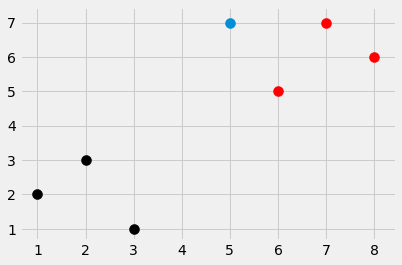

0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
0.8
1.0
0.6
1.0
1.0
0.6
0.6
0.6
0.6
0.8
0.8
1.0
1.0
1.0
0.6
1.0
0.6
0.6
0.8
1.0
0.8
1.0
1.0
0.8
0.8
0.6
0.8
1.0
1.0
0.6
0.6
1.0
1.0
0.6
1.0
1.0
1.0
0.6
1.0
0.6
0.6
0.6
1.0
1.0
1.0
0.8
0.6
1.0
0.6
1.0
1.0
0.8
0.6
1.0
1.0
0.8
0.8
0.8
0.6
1.0
0.6
0.6
0.6
1.0
0.6
1.0
0.8
1.0
0.6
0.8
0.8
1.0
0.8
0.8
0.6
0.6
0.6
0.6
0.8
0.8
1.0
0.6
1.0
0.8
0.8
0.8
0.6
1.0
0.8
0.6
1.0
0.6
0.6
1.0
0.8
0.6
0.8
0.8
0.6
1.0
0.8
0.6
0.6
0.6
1.0
0.6
1.0
0.8
1.0
1.0
0.6
0.6
1.0
0.6
0.6
0.6
1.0
1.0
1.0
0.6
0.6
1.0
1.0
0.6
0.8
0.6
0.8
0.8
1.0
1.0
1.0
0.8
1.0
1.0
0.6
0.8
1.0
0.8
0.6
0.6
1.0
0.6
0.8
1.0
1.0
1.0
1.0
0.8
0.8
1.0
1.0
0.6
1.0
1.0
0.6
0.6
0.6
0.8
0.8
0.6
0.8
0.8
1.0
1.0
1.0
0.6
1.0
0.8
1.0
1.0
0.8
1.0
0.6
0.8
0.8
0.6
0.6
0.8
0.8
0.6
1.0
0.6
0.6
0.6
0.8
0.6
0.8
0.6
1.0
0.8
0.8
1.0
0.8
0.6
0.8
0.6
0.6
0.8
1.0
1.0
1.0
0.8
1.0
1.0
0.8
1.0
0.8
0.8
1.0
1.0
1.0
1.0
1.0
0.6
0.6
0.8
0.6
0.6
0.6
1.0
0.6
1.0
0.6
1.0
0.6
1.0
0.8
0.8
1.0
0.6
0.6
1.0
1.0
0.6
0.6
1.0
0.6
0.8
1.0
0.8
0.6


/home/vit/.venv/py3/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import pandas as pd
import random

style.use('fivethirtyeight')

dataset= {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1], s=100)
plt.show()

def knn_(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]   
    confidence =  Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence

accuracies = []
for i in range(25):
    df = pd.read_csv('./datasets/breast-cancer-wisconsin.data.txt')
    df.replace('?', -99999, inplace=True)
    df.drop(['id'],1,inplace=True)
    #print(df.head())

    full_data = df.astype(float).values.tolist()

    #print(full_data[:10])
    random.shuffle(full_data)
    test_size = 0.4
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])

    for i in test_data:
        test_set[i[-1]].append(i[:-1])


    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, confidence = knn_(train_set, data, k=5)
            if group == vote:
                correct += 1
            else:
                print(confidence)
            total += 1
    #print('Accuracy:', correct/total)
    accuracies.append(correct/total)
print(sum(accuracies)/len(accuracies))


#########################################################

# https://archive.ics.uci.edu/ml/datasets.html
# breast cancer dataset wisconsin original
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd


accuracies2 = []
for i in range(25):
    df = pd.read_csv('./datasets/breast-cancer-wisconsin.data.txt')
    df.replace('?', -99999, inplace=True)
    df.drop(['id'],1,inplace=True)

    X = np.array(df.drop(['class'],1))
    y = np.array(df['class'])

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)
#     print(accuracy)
#     print(X.shape)


#     example_measures = np.array([[4,2,1,1,2,3,2,1], [4,2,1,2,2,3,2,1]])
#     example_measures = example_measures.reshape(len(example_measures),-1)
#     print(example_measures.shape)


#     prediction = clf.predict(example_measures)
#     print(prediction)
    accuracies2.append(accuracy)
print(sum(accuracies2)/len(accuracies2))
